# Predicting Customer Purchase Behavior

In [56]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score, roc_curve, f1_score
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
import pickle 

In [2]:
# Import Data
df= pd.read_csv("customer_purchase_data.csv")

In [3]:
df['Age'].value_counts().sort_index(ascending = True)

18    34
19    32
20    30
21    25
22    37
23    27
24    22
25    34
26    26
27    24
28    27
29    27
30    23
31    27
32    23
33    22
34    25
35    21
36    26
37    25
38    26
39    29
40    33
41    33
42    29
43    34
44    22
45    38
46    30
47    29
48    20
49    31
50    42
51    23
52    33
53    27
54    33
55    24
56    29
57    30
58    23
59    17
60    20
61    30
62    28
63    19
64    40
65    26
66    40
67    19
68    43
69    33
70    30
Name: Age, dtype: int64

In [4]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [5]:
df.shape

(1500, 9)

In [6]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [7]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [8]:
# Check for duplicate values.
df.duplicated().sum()

112

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(1388, 9)

In [11]:
# Conform that duplicate values are zero.
df.duplicated().sum()

0

In [12]:
# Count of male and female candidates 
male = df['Gender'].value_counts()[0]
female = df['Gender'].value_counts()[1]
print("No of Male {0} :",male)
print("No of female {1} :", female)

No of Male {0} : 692
No of female {1} : 696


In [13]:
# Count of the customer Whether he/she is a member of the loyalty program (0: No, 1: Yes)
loyal_member = df['LoyaltyProgram'].value_counts()[1]
non_loyal_member = df['LoyaltyProgram'].value_counts()[0]
print("No of loyal members {1} :",loyal_member)
print("No of Non loyal members {0} :", non_loyal_member)

No of loyal members {1} : 463
No of Non loyal members {0} : 925


In [14]:
# Count of purchase status.
purchase = df['PurchaseStatus'].value_counts()[1]
not_purchase = df['PurchaseStatus'].value_counts()[0]
print("No of purchase members {1} :",purchase)
print("No of Non purchase members {0} :", not_purchase)

No of purchase members {1} : 648
No of Non purchase members {0} : 740


### Feature Engineering

In [15]:
# Create new feature like Time Spending Efficiency. 
df = df[(df['NumberOfPurchases'] > 0) & (df['TimeSpentOnWebsite'] > 0)]

# Create new feature like Time Spending Efficiency. 
df["Time Spending Efficiency"] = df['NumberOfPurchases']/df['TimeSpentOnWebsite']

In [16]:
df.shape

(1340, 10)

### EDA

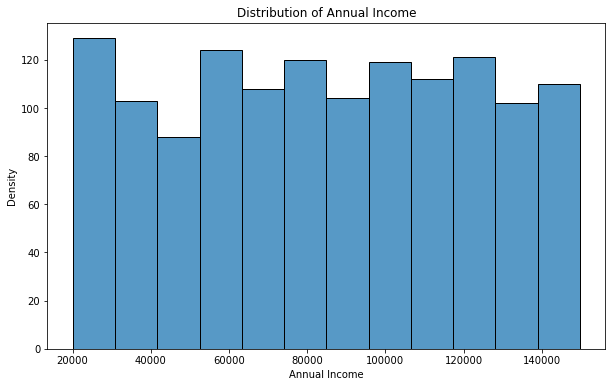

In [17]:
# Plot Distribution of 'Annual Income' 
plt.figure(figsize=(10,6))
sns.histplot(df['AnnualIncome'])
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title("Distribution of Annual Income")
plt.show()

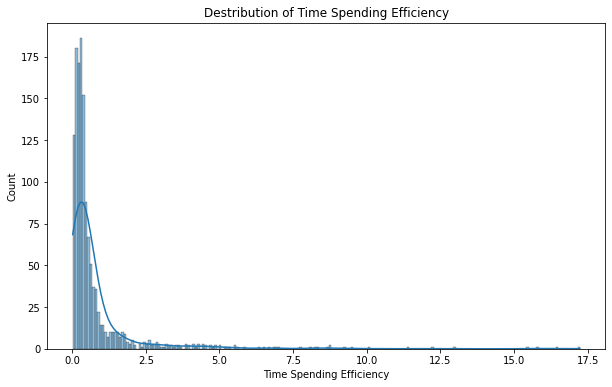

In [18]:
# Plot histogram for Spending Efficiency
plt.figure(figsize=(10,6))
sns.histplot(df['Time Spending Efficiency'], kde=True)
plt.title('Destribution of Time Spending Efficiency')
plt.show()

In [19]:
df["Time Spending Efficiency"].value_counts()

0.261706    1
0.322854    1
0.051272    1
0.255923    1
0.118468    1
           ..
0.166013    1
0.209384    1
0.118976    1
2.634944    1
0.512861    1
Name: Time Spending Efficiency, Length: 1340, dtype: int64

In [20]:
df.corr()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,Time Spending Efficiency
Age,1.000000,0.015712,0.008538,-0.063385,-0.011514,0.022164,-0.004340,0.014900,-0.265869,-0.035863
Gender,0.015712,1.000000,0.008876,-0.006814,-0.014186,0.006521,0.040485,-0.043419,0.009334,-0.004562
AnnualIncome,0.008538,0.008876,1.000000,-0.001506,0.022453,0.004922,-0.037378,0.031952,0.197058,-0.025278
NumberOfPurchases,-0.063385,-0.006814,-0.001506,1.000000,0.021802,0.024657,0.044434,0.024887,0.203747,0.276408
ProductCategory,-0.011514,-0.014186,0.022453,0.021802,1.000000,-0.003419,0.035196,0.022624,0.018432,0.033731
TimeSpentOnWebsite,0.022164,0.006521,0.004922,0.024657,-0.003419,1.000000,-0.002606,0.004371,0.279069,-0.500933
LoyaltyProgram,-0.004340,0.040485,-0.037378,0.044434,0.035196,-0.002606,1.000000,-0.051278,0.314997,0.021271
DiscountsAvailed,0.014900,-0.043419,0.031952,0.024887,0.022624,0.004371,-0.051278,1.000000,0.299709,0.009066
PurchaseStatus,-0.265869,0.009334,0.197058,0.203747,0.018432,0.279069,0.314997,0.299709,1.000000,-0.078239
Time Spending Efficiency,-0.035863,-0.004562,-0.025278,0.276408,0.033731,-0.500933,0.021271,0.009066,-0.078239,1.000000


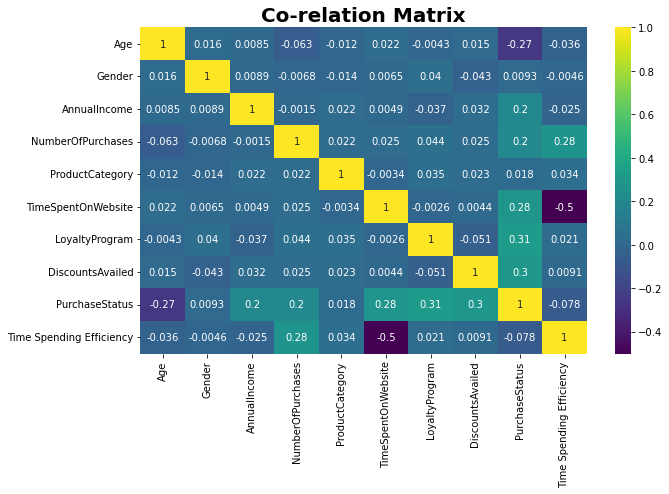

In [21]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = "viridis", annot=True)
plt.title("Co-relation Matrix", fontweight='bold', fontsize=20)
plt.show()

<Figure size 2160x2160 with 0 Axes>

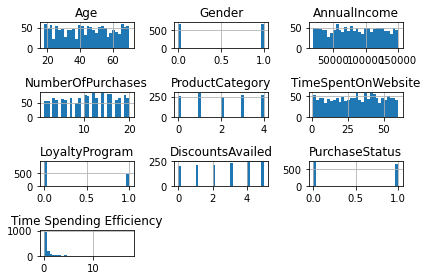

In [22]:
# Plot Histogram
plt.figure(figsize=(30,30))
df.hist(bins=30)
plt.tight_layout()
plt.show()

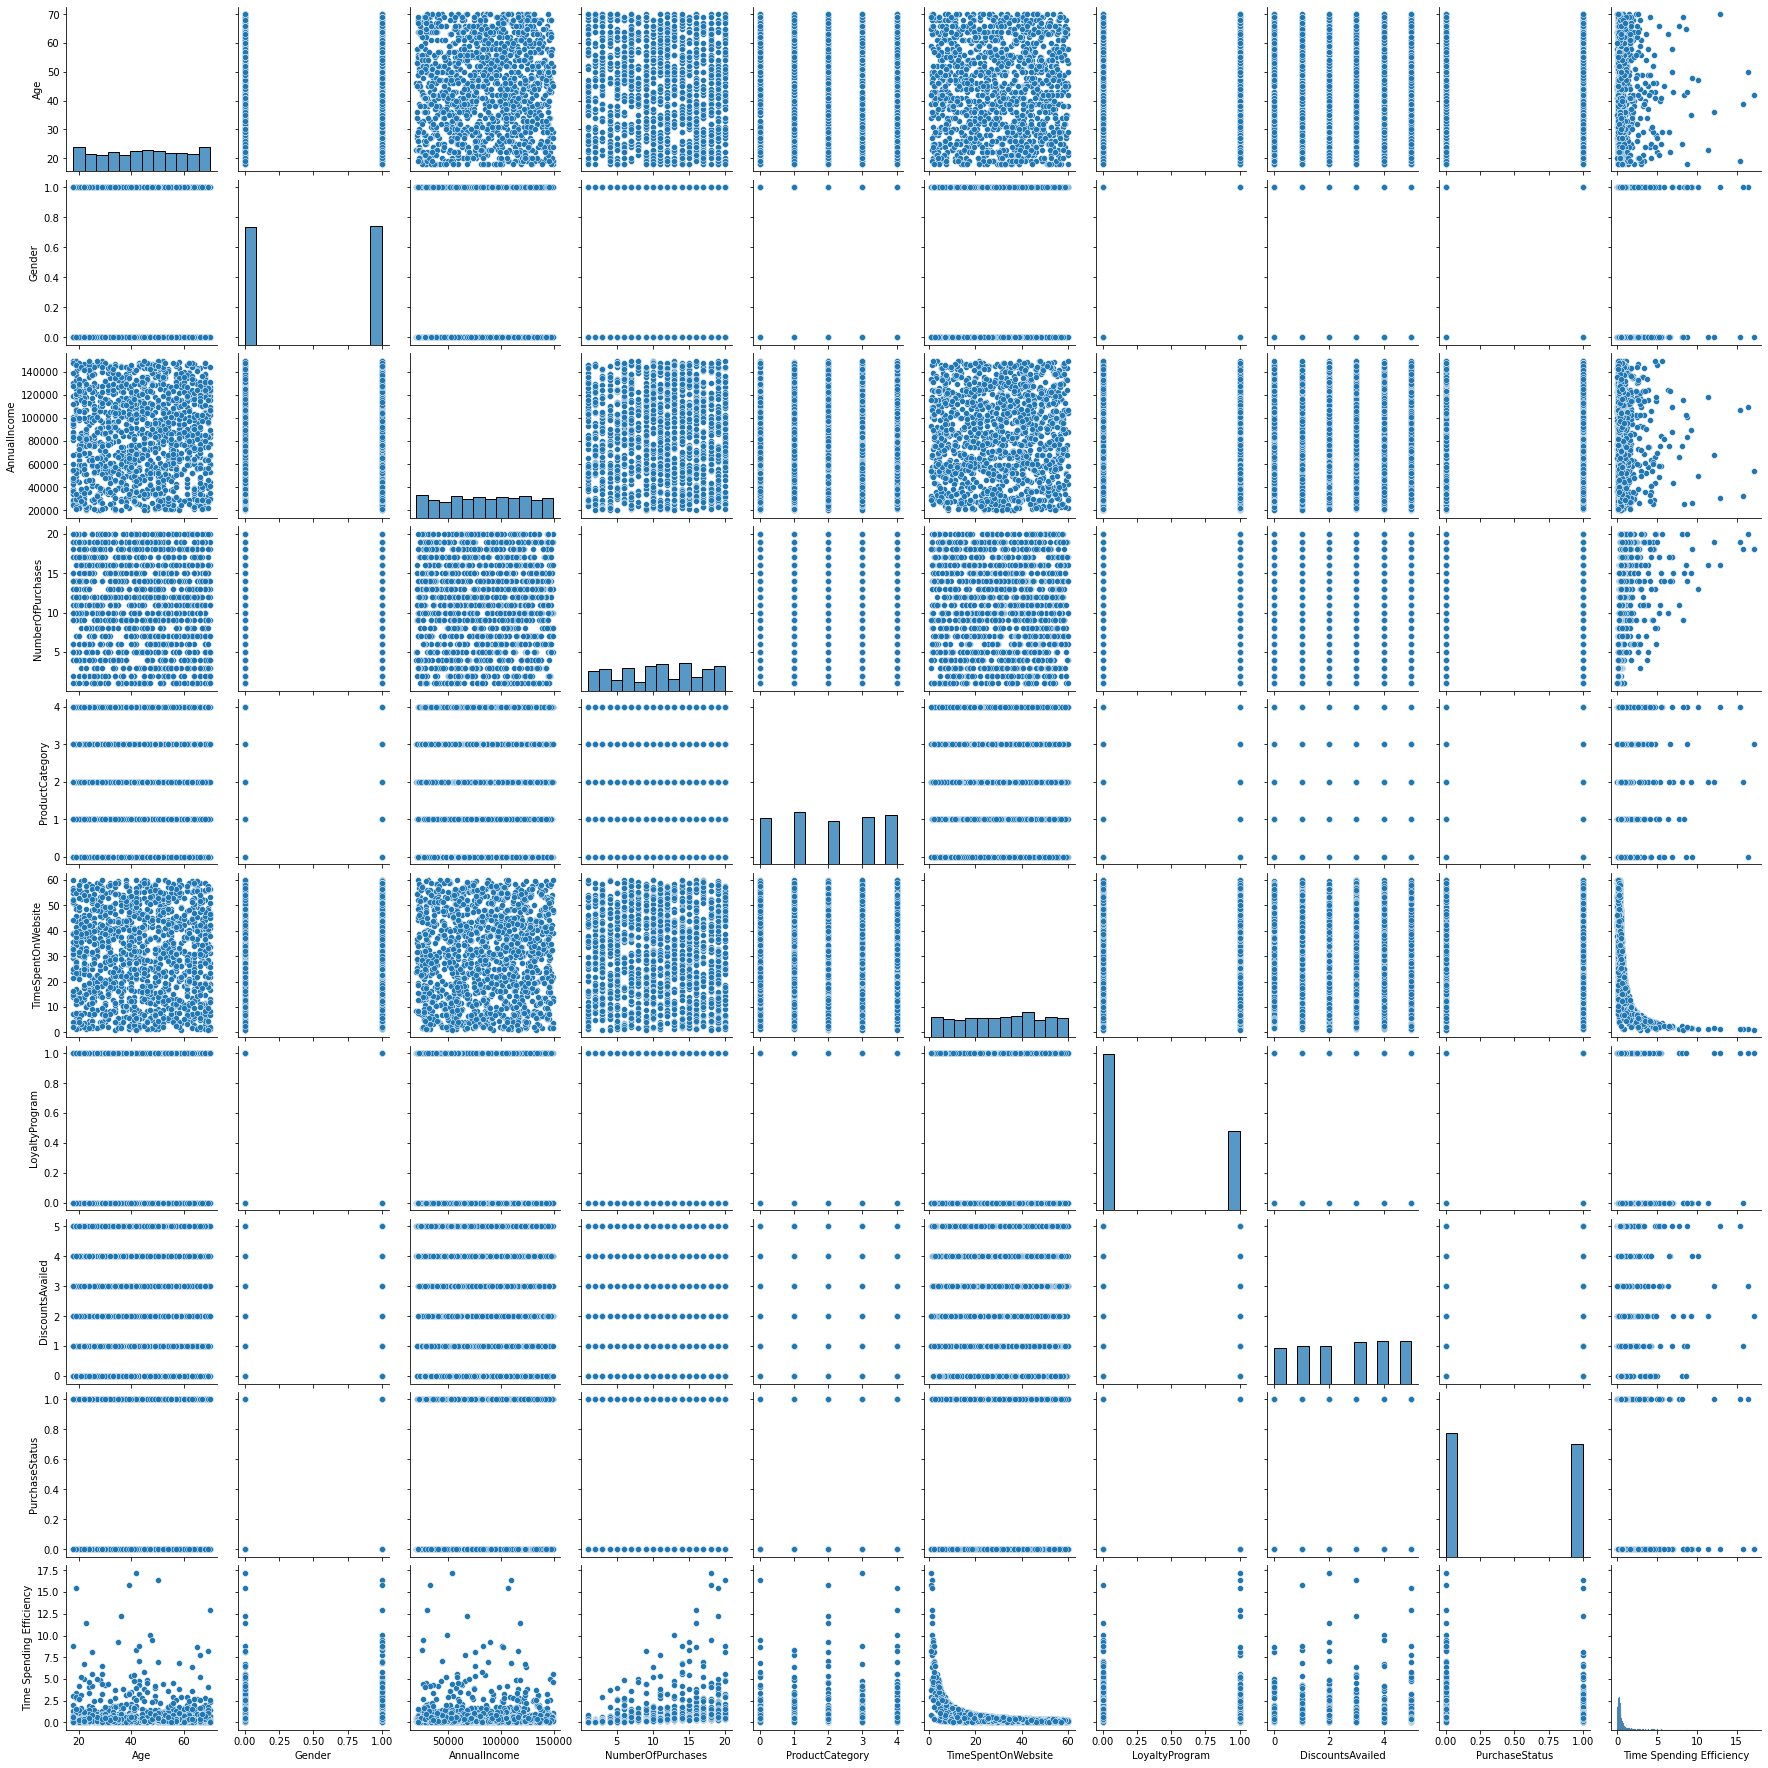

In [23]:
# Plot pair plot
sns.pairplot(df)
plt.show()

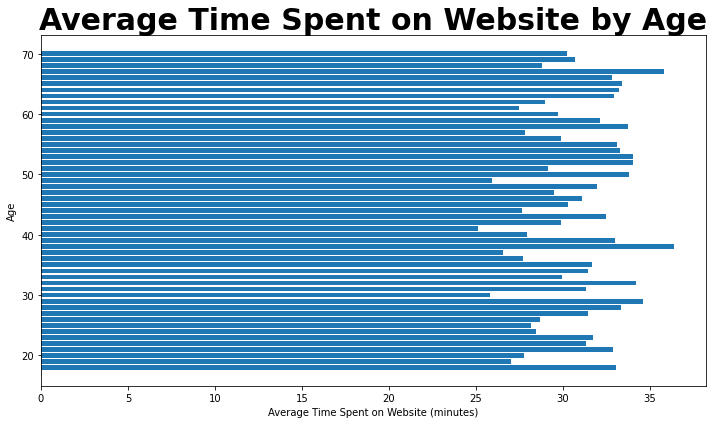

In [24]:
# Group by Age and calculate the average Time Spent on Website
grouped_Age = df.groupby('Age')['TimeSpentOnWebsite'].mean()

# Plot the horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(grouped_Age.index, grouped_Age.values)
plt.xlabel('Average Time Spent on Website (minutes)')
plt.ylabel('Age')
plt.title('Average Time Spent on Website by Age', fontweight='bold', fontsize=30)
plt.tight_layout()
plt.show()


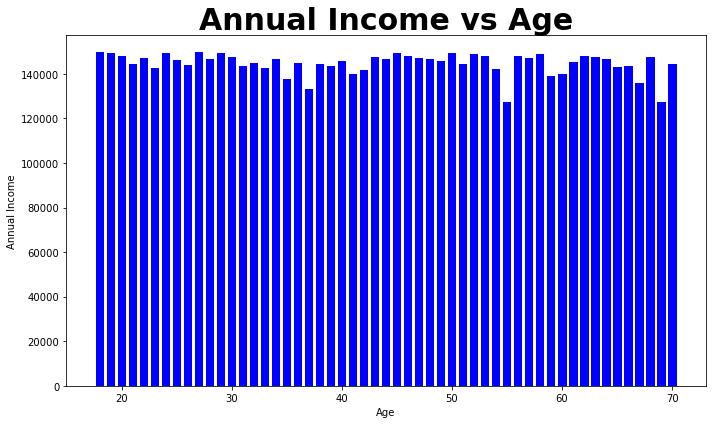

In [25]:
# Plot a Bar Graph for Annual Income vs Age
plt.figure(figsize=(10,6))
plt.bar(x=df['Age'], height=df['AnnualIncome'], color = 'b')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Annual Income vs Age', fontweight='bold', fontsize=30)
plt.tight_layout()
plt.show()

**There is no concreate relation between Annual Income and Age.**

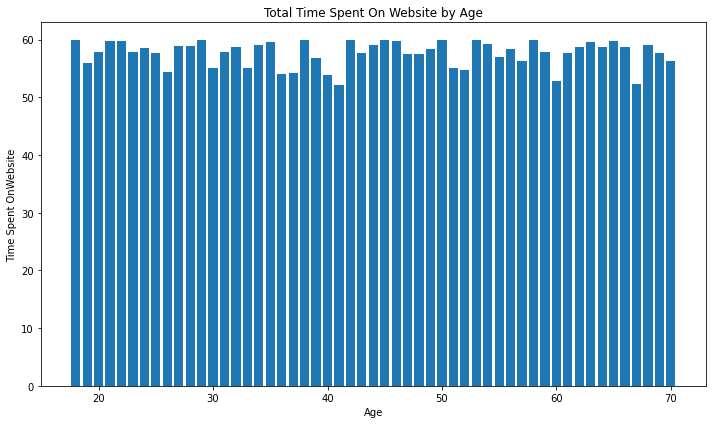

In [26]:
# Plot a Bar Graph for Total Time (Minutes) Spent On Website vs Age
plt.figure(figsize=(10,6))
plt.bar(x=df['Age'], height=df['TimeSpentOnWebsite'])
plt.xlabel('Age')
plt.ylabel('Time Spent OnWebsite')
plt.title('Total Time Spent On Website by Age')
plt.tight_layout()
plt.show()

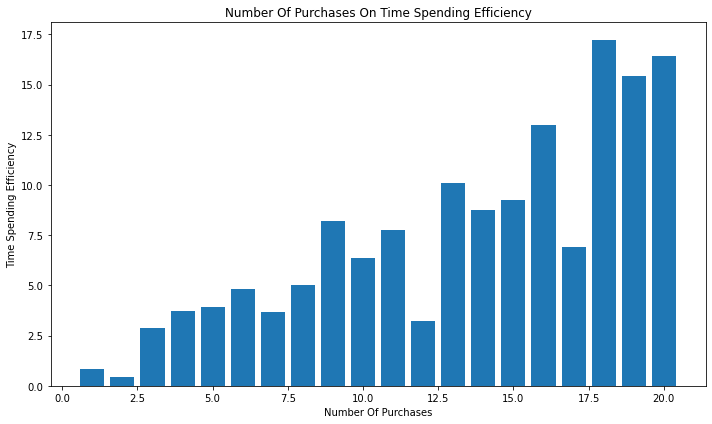

In [61]:
# Plot a Bar Graph for Total Time (Minutes) Spent On Website vs Age
plt.figure(figsize=(10,6))
plt.bar(x=df['NumberOfPurchases'], height=df['Time Spending Efficiency'])
plt.xlabel('Number Of Purchases')
plt.ylabel('Time Spending Efficiency')
plt.title('Number Of Purchases On Time Spending Efficiency')
plt.tight_layout()
plt.show()

**Total time spends for the Age group of 18 to 70 is within the range of 50 to 60 minutes.**

In [27]:
# Top 10 Age for Average Time Spent On Website.
grouped_Age.sort_values(ascending=False)[:10]

Age
38    36.395572
67    35.826081
29    34.597828
32    34.190881
52    34.040188
53    34.026301
50    33.815133
58    33.753390
65    33.401993
28    33.355590
Name: TimeSpentOnWebsite, dtype: float64

**People having age of 38, 67, 29, 32 spends maximun time on website**

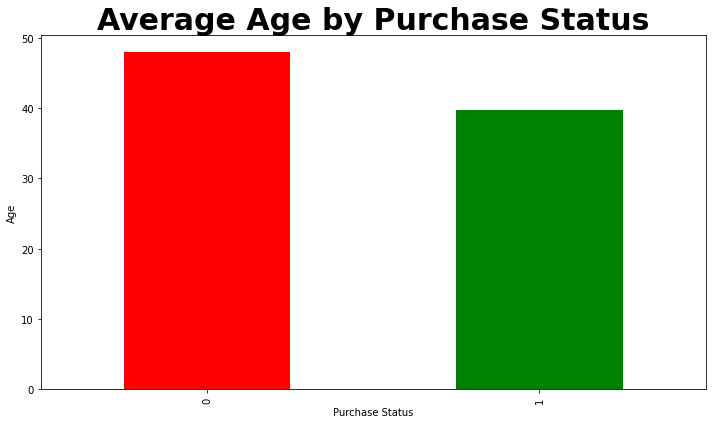

In [28]:
# Plot a Bar Graph for Average Age by Purchase Status.
Purchase_status_by_age = df.groupby('PurchaseStatus')['Age'].mean()

plt.figure(figsize=(10,6))
Purchase_status_by_age.plot(kind='bar' ,color = ['r','green'])
plt.xlabel('Purchase Status')
plt.ylabel('Age')
plt.title('Average Age by Purchase Status', fontweight='bold', fontsize=30)
plt.tight_layout()
plt.show()

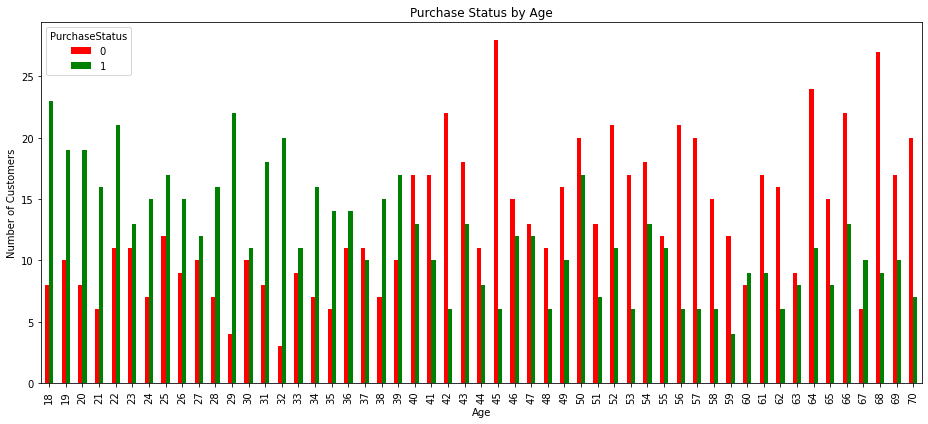

In [29]:
# Plot a Bar Graph for Grouped Purchase status and age.

purchase_status_by_age = df.groupby(['Age', 'PurchaseStatus']).size().unstack()

purchase_status_by_age.plot(kind='bar', figsize=(13, 6), color=['red', 'green'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Purchase Status by Age')
plt.tight_layout()
plt.show()

In [30]:
print("Purchase Status {1} : Yes , product is purchased")
print("Purchase Status {0} : No , product is not purchased")

Purchase Status {1} : Yes , product is purchased
Purchase Status {0} : No , product is not purchased


**As you can see Age group of 18 to 39 are purchasing more than Age group of 40 to 70**

In [31]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,Time Spending Efficiency
0,40,1,66120.267939,8,0,30.568601,0,5,1,0.261706
1,20,1,23579.773583,4,2,38.240097,0,5,0,0.104602
2,27,1,127821.306432,11,2,31.633212,1,0,1,0.347736
3,24,1,137798.623120,19,3,46.167059,0,4,1,0.411549
4,31,1,99300.964220,19,1,19.823592,0,0,1,0.958454


In [32]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus', 'Time Spending Efficiency'],
      dtype='object')

In [33]:
# Define Dependant and Independant Variables
X = df.drop('PurchaseStatus',axis=1) # Independant
y = df['PurchaseStatus'] # Dependant

In [34]:
# Create Numeric Transformer
numeric_transformer = Pipeline(steps=[('Scale',MinMaxScaler())])

In [35]:
# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X.columns)])

In [36]:
# Split the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [37]:
# Use Pipeline for model buliding
all_models = {'Logistic Regression': LogisticRegression(),
          'Support Vector Classifier': SVC(probability=True),
          'K Neighbours Classifier' : KNeighborsClassifier(),
          'Random Forest Classifier': RandomForestClassifier()
            }

for name,classifier in all_models.items():
    model = Pipeline(steps=[('preprocessor',preprocessor),
                            ('classifier', classifier)])
    # Fit the model and predictbthe output
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy of {name} : {accuracy_score(y_test, y_pred):0.2f}')
    

Accuracy of Logistic Regression : 0.80
Accuracy of Support Vector Classifier : 0.83
Accuracy of K Neighbours Classifier : 0.83
Accuracy of Random Forest Classifier : 0.93


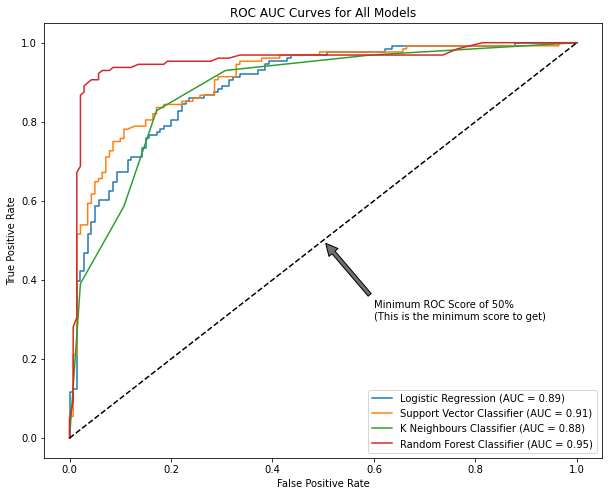

In [38]:
# PLot ROC AUC Curve

plt.figure(figsize=(10, 8))

for name,classifier in all_models.items():
    model = Pipeline(steps=[('preprocessor',preprocessor),
                            ('classifier', classifier)])
    # Fit the model and predictbthe output
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Plot ROC curve for all models
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    
# Plot diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Configure plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for All Models')
plt.legend(loc='best')
plt.annotate('Minimum ROC Score of 50%\n(This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.show()

**AUC SCore for Random Forest Classifier is highest i.e. 95.**

**Based on accuracy, cross-validation and ROC-AUC scores ,we can choose the best-performing model as Random Forest Classifier.**

In [39]:
# Use Pipeline for cross vaidation of all classifiers.
for name, classifier in all_models.items():
    model = Pipeline(steps=[('preprocessor',preprocessor),
                            ('classifier',classifier)])
    
    # perform K-Fold cross-validation
    cv_scores = cross_val_score(model,X,y, cv=5, scoring='accuracy')
    
    # Print Mean CV Score
    print(f'{name} CV Score : {cv_scores.mean():0.2f}')
    

Logistic Regression CV Score : 0.81
Support Vector Classifier CV Score : 0.85
K Neighbours Classifier CV Score : 0.81
Random Forest Classifier CV Score : 0.93


**Cross Vaidation Score Score for Random Forest Classifier is 93 %. Which is highest amongst all**

## Hyperparameter Tuning

In [40]:
# Define Random Forest Classifier Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define the hyperparameters and their possible values to search for Random Forest Classifier
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [41]:
# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('Scale',
                                                                                          MinMaxScaler())]),
                                                                         Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'Time Spending Efficiency'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [42]:
# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best Score: 0.9188437296239949


In [43]:
# Evaluate the Model on the test data.
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
print(f'Accuracy of the Random Forest Classifier: {accuracy_score(y_test, y_pred):0.2f}')

Accuracy of the Random Forest Classifier: 0.94


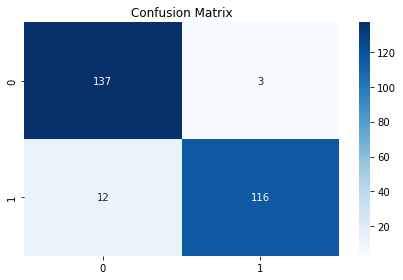

In [44]:
# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True,fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [45]:
# Extract TP, FP, TN, FN
TN, FP, FN, TP = matrix.ravel()

# Print the values
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

True Positive (TP): 116
False Positive (FP): 3
True Negative (TN): 137
False Negative (FN): 12


In [53]:
# Print Classification Report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       140
           1       0.96      0.90      0.93       128

    accuracy                           0.93       268
   macro avg       0.94      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268



## Save the Model

In [57]:
pickle.dump(best_rf_model,open('Predicting Customer Purchase Behavior Model.pkl','wb'))

## Conclusion:

**Model Performance:** Four models were trained on the data – Logistic Regression Model, Support Vector Classifier Model, K N. Neighbours Model and Random Forest Model. Their performance scores were as follows:

     Logistic Regression Model Score: 80 %
     Support Vector Classifier Model Score: 83 %
     K N. Neighbours Model Score: 83 %
     Random Forest Model Score: 93 %
     
**Cross-Validation:** All the Models underwent cross-validation, assessing its consistency across different data subsets. The Mean Cross-Validation Score for Random Forest Model is 93% and after Hyperparameter tuning accuracy increased to 94%. This underscores the model's robustness and its capacity to generalize effectively to new data.

- Insights:
    * Found that age groups 18-39 generally spend more time on the website and make more purchases compared to older age groups.
    * Identified significant correlations between features like Time Spent on Website and Purchase Status.
    * Time Spent on Website is a strong predictor of purchase behavior.
    * Loyal customers and those availing discounts have a higher likelihood of making a purchase.
    

## Recommendations:

- To enhance business growth and optimize decision-making, consider the following strategies: 

    * Target marketing efforts towards the 18-39 age group.
    * Make new strategies to target age group above 40.
    * Enhance website engagement strategies to increase time spent on the site.
    * Offer more discounts and loyalty incentives to boost purchase rates.